# Hierarchical clustering parameters: method and distance metric

In [1]:
#TODO: remove after development 
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd

pd.set_option('display.max_columns', 5400)
pd.set_option('max_colwidth', 50)

## Loading data

In [4]:
#seed_name = 'hair_dryer'
#seed_name = 'video_codec'
#seed_name = 'diesel'
#seed_name = "contact_lens"
seed_name = "3d_printer"

src_dir = "."

In [5]:
import pickle

with open(src_dir + "/data/" + seed_name + "/tsne.pkl", 'rb') as infile:
    df = pickle.load(infile)
    
print(df.shape)
df.head()

(417, 17)


,pub_num,publication_number,country_code,family_id,priority_date,title_text,abstract_text,claims_text,refs,cpcs,ipcs,assignees_harmonized,ExpansionLevel,text_prep,tokens,x,y
0,8813847,US-8813847-B2,US,44509594,20080326,Hydraulic fracturing,An improvement over known hydraulic fracturing...,What is claimed is: \n \n 1. A metho...,"US-7122509-B2,US-2006175060-A1,US-7299876-B2,U...","C09K2208/10,C09K8/032,C09K8/70,C09K2208/28,C09...","C08K3/34,C09K8/68,C09K8/62,C09K8/80,C08K3/40,C...",ECOPURO LLC,Seed,Hydraulic fracturing An improvement over known...,"[hydraulic, fracturing, improvement, hydraulic...",-12.141430,-5.289605
1,9987792,US-9987792-B2,US,52110245,20130623,Methods and apparatus for mobile additive manu...,The present disclosure provides various aspect...,The invention claimed is: \n \n 1. A...,"US-2013295338-A1,CN-202202237-U,US-2013051913-...","B29C64/386,E01C23/07,E01C11/005,B29C64/20,B29L...","E01C23/01,E01C23/06,B29C64/20,E01C11/00,B33Y50...","FLITSCH ROBERT A,FLITSCH FREDERICK A",Seed,Methods and apparatus for mobile additive manu...,"[methods, apparatus, mobile, additive, manufac...",17.464500,-9.535550
2,2017305137,US-2017305137-A1,US,52110245,20130623,Methods and apparatus for mobile additive manu...,The present disclosure provides various aspect...,1 . A mobile additive manufacturing apparatus ...,"US-2011146111-A1,US-4881361-A,US-2009000323-A1","E01C23/07,E01C23/01,E01C11/005,E01C23/0966,B29...","B29L31/00,E01C11/00,E01C23/06,E01C23/01,B33Y30...","FLITSCH ROBERT A,FLITSCH FREDERICK A",Seed,Methods and apparatus for mobile additive manu...,"[methods, apparatus, mobile, additive, manufac...",-0.840286,10.265307
3,8791194,US-8791194-B2,US,42099462,20080326,Structurally enhanced plastics with filler rei...,"A composition comprising a fluid, and a materi...",What is claimed is: \n \n 1. A metho...,"US-2006012074-A1,US-2007048527-A1,US-200405405...","C08K3/34,B29K2105/0032,F15D1/12,B29B7/002,B29C...","C08K3/34,C08J5/16,C08K7/26",ECOPURO LLC,Seed,Structurally enhanced plastics with filler rei...,"[structurally, enhanced, plastics, filler, rei...",-11.728927,-3.468357
4,2015194255,US-2015194255-A1,US,53495741,20140106,Energy management system,A split-flux transformer has a primary or inpu...,1 . A split flux transformer comprising\n a. a...,"US-3553620-A,US-5555494-A","H02N11/008,H01F27/28,H01F27/38,H01F30/10",H01F27/28,ALEK WILLIAM,Seed,Energy management system A split-flux transfor...,"[energy, management, system, split, flux, tran...",29.331837,-16.537663


### Hierarchical clustering

Checking the Cophenetic Correlation Coefficient of the clustering.<br> 
This compares (correlates) the actual pairwise distances of all samples to those implied by the hierarchical clustering.<br>
The closer the value is to 1, the better the clustering preserves the original distances

In [6]:
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

clustering_features = df[["x", "y"]]

In [7]:
%%time

methods = ["single", "complete", "average", 'weighted', 'centroid', 'median', 'ward']
metrics = ['euclidean', 'cosine', 'braycurtis']

for metric in metrics:
    print(metric + " metric")
    for method in methods:
        if (method in ['centroid', 'median', 'ward'] and metric != 'euclidean'):
            continue
        else:
            linkage = shc.linkage(clustering_features, method=method, metric=metric)
            c, coph_dists = cophenet(linkage, pdist(clustering_features))
            print(method + " " + str(c))
    print("\n")

euclidean metric
single 0.24794800700082634
complete 0.6412017059948265
average 0.6885160158519823
weighted 0.6501049523817332
centroid 0.7012128226604628
median 0.6372159361399499
ward 0.6667966427340508


cosine metric
single 0.6649218676276618
complete 0.6022466655220843
average 0.6846812782883936
weighted 0.6621338340082179


braycurtis metric
single -0.017304007024223376
complete 0.45637340162624335
average 0.6385425801551678
weighted 0.6520124703745246


Wall time: 78.1 ms


Based on this linkage we can plot the dendogram.<br>

The parameter `max_d` gives you the possibility to decide at which `x` value you want to split.

In [8]:
%%time

linkage = shc.linkage(clustering_features, method='average', metric='euclidean', optimal_ordering=True)

Wall time: 205 ms


In [15]:
max_d = {}
max_d["hair_dryer"] = {"big": 10, "medium": 3.5, "small": 1}
max_d["video_codec"] = {"big": 45, "medium": 18, "small": 10}
max_d["diesel"] = {"big": 45, "medium": 18, "small": 10}
max_d["contact_lens"] = {"big": 45, "medium": 20, "small": 10}
max_d["3d_printer"] = {"big": 20, "medium": 10, "small": 5}

Wall time: 133 ms


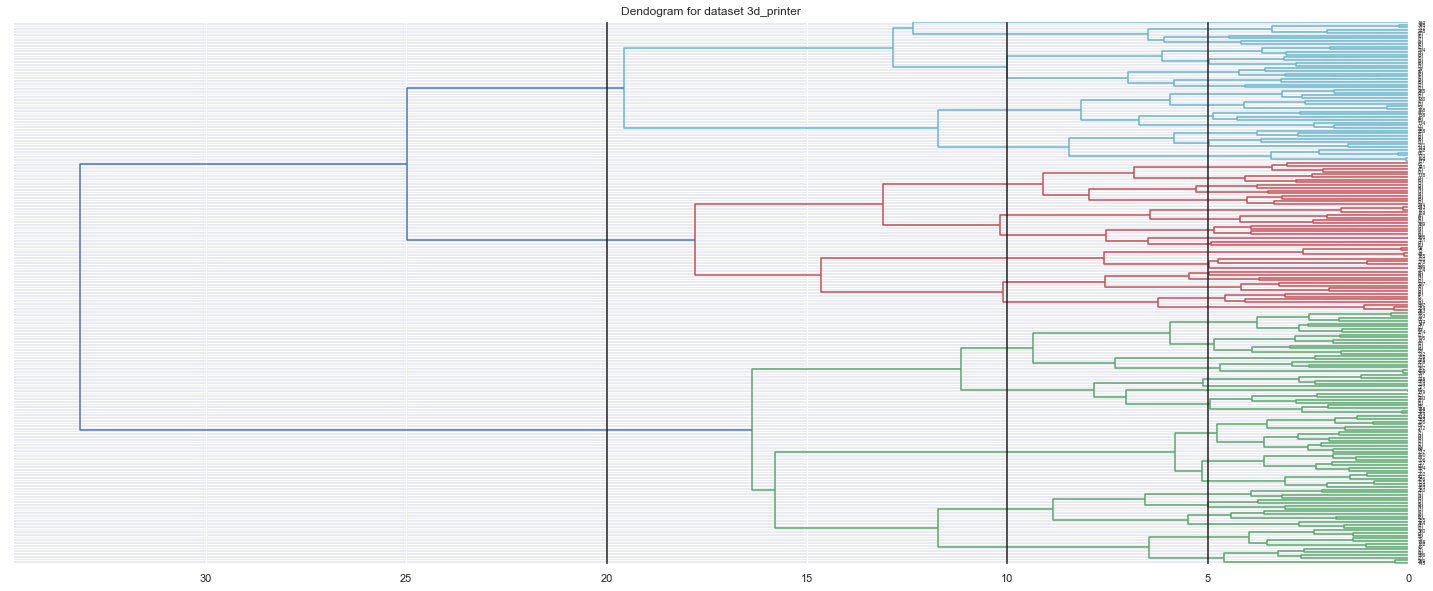

In [16]:
%%time

plt.figure(figsize=(25, 10))  
plt.title("Dendogram for dataset " + seed_name)

dend = shc.dendrogram(linkage, p=7, truncate_mode='level', orientation='left', show_leaf_counts=True, show_contracted=True)

for k, v in max_d[seed_name].items():
    plt.axvline(x=v, c='k')

fcluster predicts the cluster membership for all objects in our dataset (id's from 1 to n).

In [17]:
from scipy.cluster.hierarchy import fcluster

cluster_sizes =  ['big', 'medium', 'small']

for size in cluster_sizes:
    fcluster_pred = fcluster(linkage, max_d[seed_name][size], criterion='distance')
    print(str(len(pd.unique(fcluster_pred))) + ' clusters at cluster size ' + str(size))

3 clusters at cluster size big
17 clusters at cluster size medium
50 clusters at cluster size small
